In [269]:
import cv2
import numpy as np
import math
from commonfunctions import *
from scipy.ndimage import interpolation as inter

In [270]:
def biggest_contour(contours):
    biggest = np.array([])
    max_area = 0
    for i in contours:
        area = cv2.contourArea(i)
        if area > 1000:
            peri = cv2.arcLength(i, True)
            approx = cv2.approxPolyDP(i, 0.015 * peri, True)
            if area > max_area and len(approx) == 4:
                biggest = approx
                max_area = area
    return biggest

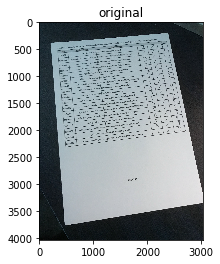

In [292]:
img = cv2.imread('../10.jpg')
show_images([img], ['original'])

img_original = img.copy()

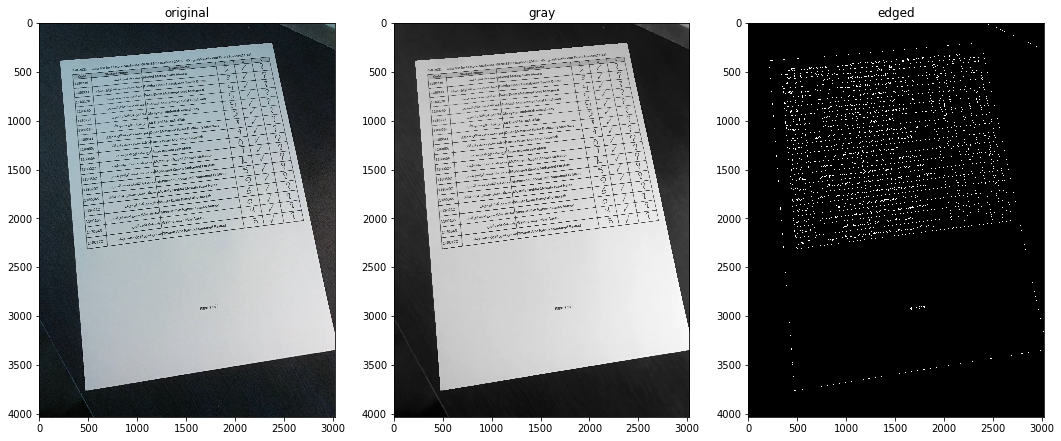

In [293]:


# Image modification
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.bilateralFilter(gray, 20, 30, 30)

# grad_x = cv2.Sobel(gray, -1, 1, 0)
# # Gradient-Y

# grad_y = cv2.Sobel(gray, -1, 0, 1)


# abs_grad_x = cv2.convertScaleAbs(grad_x)
# abs_grad_y = cv2.convertScaleAbs(grad_y)


# grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

edged = cv2.Canny(gray, 20, 200)

show_images([img, gray, edged], ['original', 'gray','edged'])


In [294]:
Cont, contours, hierarchy = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]




In [295]:
biggest = biggest_contour(contours)

cv2.drawContours(img, [biggest], -1, (0, 255, 0), 3)

array([[[ 40,  50,  60],
        [ 42,  52,  62],
        [ 35,  47,  57],
        ...,
        [100, 135, 138],
        [101, 136, 139],
        [102, 137, 140]],

       [[ 38,  48,  58],
        [ 37,  47,  57],
        [ 28,  40,  50],
        ...,
        [100, 135, 138],
        [101, 136, 139],
        [103, 138, 141]],

       [[ 33,  43,  53],
        [ 31,  41,  51],
        [ 23,  35,  45],
        ...,
        [101, 136, 139],
        [103, 138, 141],
        [104, 139, 142]],

       ...,

       [[  5,   6,   4],
        [  5,   6,   4],
        [  5,   6,   4],
        ...,
        [ 34,  37,  45],
        [ 31,  34,  42],
        [ 27,  30,  38]],

       [[  5,   6,   4],
        [  4,   5,   3],
        [  3,   4,   2],
        ...,
        [ 35,  38,  46],
        [ 31,  34,  42],
        [ 26,  29,  37]],

       [[  4,   5,   3],
        [  4,   5,   3],
        [  3,   4,   2],
        ...,
        [ 34,  37,  45],
        [ 29,  32,  40],
        [ 22,  25,  33]]

In [296]:
points = biggest.reshape(4, 2)
input_points = np.zeros((4, 2), dtype="float32")

In [297]:
points_sum = points.sum(axis=1)
input_points[0] = points[np.argmin(points_sum)]
input_points[3] = points[np.argmax(points_sum)]

points_diff = np.diff(points, axis=1)
input_points[1] = points[np.argmin(points_diff)]
input_points[2] = points[np.argmax(points_diff)]


In [298]:
(top_left, top_right, bottom_right, bottom_left) = input_points
bottom_width = np.sqrt(((bottom_right[0] - bottom_left[0]) ** 2) + ((bottom_right[1] - bottom_left[1]) ** 2))
top_width = np.sqrt(((top_right[0] - top_left[0]) ** 2) + ((top_right[1] - top_left[1]) ** 2))
right_height = np.sqrt(((top_right[0] - bottom_right[0]) ** 2) + ((top_right[1] - bottom_right[1]) ** 2))
left_height = np.sqrt(((top_left[0] - bottom_left[0]) ** 2) + ((top_left[1] - bottom_left[1]) ** 2))

In [307]:
# Output image size
max_width = max(int(bottom_width), int(top_width))
# max_height = max(int(right_height), int(left_height))
max_height = int(max_width * 0.9)  # for A4

# Desired points values in the output image
converted_points = np.float32([[0, 0], [max_width, 0], [0, max_height], [max_width, max_height]])

In [308]:
# Perspective transformation
matrix = cv2.getPerspectiveTransform(input_points, converted_points)
img_output = cv2.warpPerspective(img_original, matrix, (max_width, max_height))

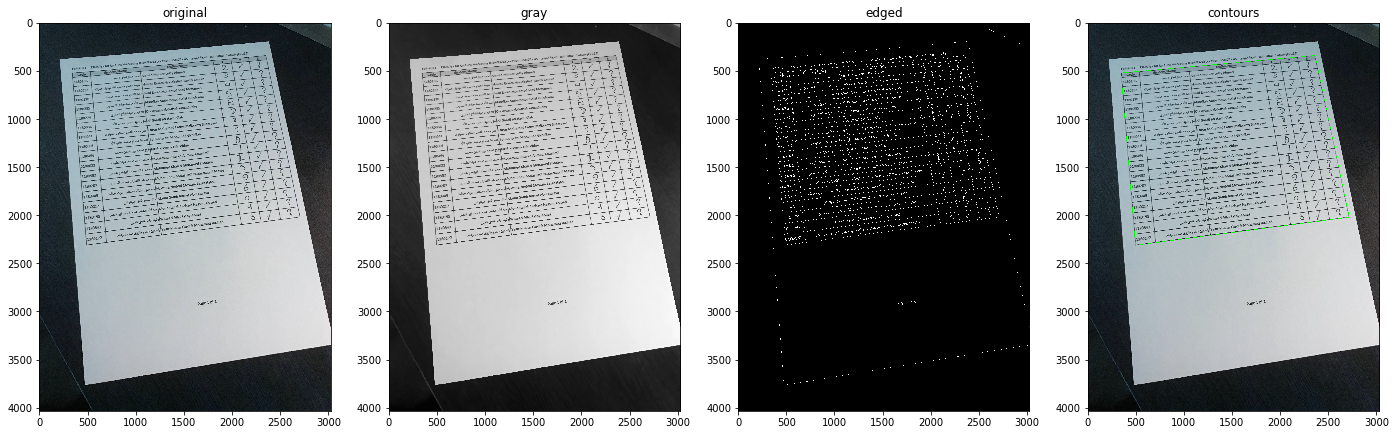

In [309]:
show_images([img_original, gray, edged, img], ['original','gray','edged','contours'])


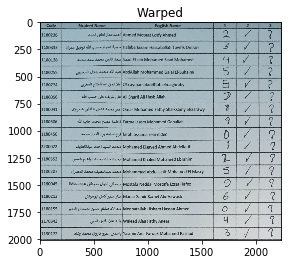

In [310]:
show_images([img_output], ['Warped'])